In [1]:
import xgboost as xgb
import numpy as np
from  sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.datasets import load_iris,load_digits,load_boston

D:\software\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
rng = np.random.RandomState(31337)

## 二分类混淆矩阵

In [5]:
digits = load_digits()

In [7]:
x= digits['data']
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
y = digits['target']
y

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
kf = KFold(n_splits=2,shuffle=True,random_state=rng)

In [12]:
for train_index,test_index in kf.split(x):
    xgb_model = xgb.XGBClassifier().fit(x[train_index],y[train_index])
    pred = xgb_model.predict(x[test_index])
    actual = y[test_index]
    print(confusion_matrix(actual,pred))

D:\software\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[84  0  0  0  0  2  0  0  0  0]
 [ 2 86  0  0  0  0  0  0  0  2]
 [ 1  1 75  3  0  0  1  0  1  1]
 [ 0  0  1 90  0  2  0  1  2  2]
 [ 0  0  0  0 84  0  0  0  1  1]
 [ 0  0  0  0  2 94  0  0  1  2]
 [ 0  0  2  0  1  0 86  0  0  0]
 [ 0  0  0  0  0  0  0 93  0  1]
 [ 0  1  1  0  0  1  0  0 76  2]
 [ 1  0  0  0  0  2  0  0  4 86]]
[18:13:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\software\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[87  0  0  0  2  0  0  0  3  0]
 [ 0 90  0  1  0  0  0  0  0  1]
 [ 1  1 91  0  0  0  0  0  1  0]
 [ 0  1  1 80  0  1  0  1  1  0]
 [ 3  1  0  0 88  0  0  1  1  1]
 [ 0  0  0  0  0 81  0  0  0  2]
 [ 0  0  0  0  0  0 90  0  2  0]
 [ 0  0  0  0  1  0  0 83  1  0]
 [ 0  6  0  2  0  1  2  2 78  2]
 [ 0  0  0  1  0  0  0  2  0 84]]


In [13]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
iris = load_iris()
y = iris['target']
x = iris['data']
kf = KFold(2,shuffle=True,random_state=rng)
for train_index,test_index in kf.split(x):
    xgb_model = xgb.XGBClassifier().fit(x[train_index],y[train_index])
    pred = xgb_model.predict(x[test_index])
    actual = y[test_index]
    print(confusion_matrix(actual,pred))

[18:16:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[29  0  0]
 [ 0 24  1]
 [ 0  1 20]]
[18:16:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[21  0  0]
 [ 0 21  4]
 [ 0  2 27]]


D:\software\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\software\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [15]:
boston = load_boston()
y = boston['target']
x = boston['data']
kf = KFold(2,shuffle=True,random_state=rng)
for train_index,test_index in kf.split(x):
    xgb_model = xgb.XGBRegressor().fit(x[train_index],y[train_index])
    pred = xgb_model.predict(x[test_index])
    actual = y[test_index]
    print(mean_squared_error(actual,pred))

D:\software\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

15.262105023328399
10.144190394517386


In [22]:
y = boston['target']
x  = boston['data']
xgb_model = xgb.XGBRegressor()
para_dict = {'max_depth':[2,4,6],
             'n_estimators':[50,100,200]}
             

In [24]:
clf = GridSearchCV(xgb_model,para_dict,verbose=1)
clf.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [25]:
clf.best_params_

{'max_depth': 2, 'n_estimators': 100}

Type:        module
String form: <module 'xgboost' from 'D:\\software\\anaconda\\lib\\site-packages\\xgboost\\__init__.py'>
File:        d:\software\anaconda\lib\site-packages\xgboost\__init__.py
Docstring:  
XGBoost: eXtreme Gradient Boosting library.

Contributors: https://github.com/dmlc/xgboost/blob/master/CONTRIBUTORS.md


In [21]:
xgb.XGBRegressor?

Init signature:
xgb.XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : typing.Union[str, typing.Callable[[numpy.ndarray, numpy.ndarray], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: Optional[str]
    

In [29]:
x = digits['data']
y = digits['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
clf = xgb.XGBClassifier(use_label_encoder=False)
clf.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(x_test,y_test)])

[0]	validation_0-auc:0.98544
[1]	validation_0-auc:0.99122
[2]	validation_0-auc:0.99268
[3]	validation_0-auc:0.99368
[4]	validation_0-auc:0.99414
[5]	validation_0-auc:0.99495
[6]	validation_0-auc:0.99569
[7]	validation_0-auc:0.99611
[8]	validation_0-auc:0.99650
[9]	validation_0-auc:0.99684
[10]	validation_0-auc:0.99716
[11]	validation_0-auc:0.99746
[12]	validation_0-auc:0.99752
[13]	validation_0-auc:0.99768
[14]	validation_0-auc:0.99794
[15]	validation_0-auc:0.99808
[16]	validation_0-auc:0.99815
[17]	validation_0-auc:0.99828
[18]	validation_0-auc:0.99835
[19]	validation_0-auc:0.99845
[20]	validation_0-auc:0.99854
[21]	validation_0-auc:0.99855
[22]	validation_0-auc:0.99868
[23]	validation_0-auc:0.99869
[24]	validation_0-auc:0.99877
[25]	validation_0-auc:0.99877
[26]	validation_0-auc:0.99881
[27]	validation_0-auc:0.99886
[28]	validation_0-auc:0.99885
[29]	validation_0-auc:0.99891
[30]	validation_0-auc:0.99891
[31]	validation_0-auc:0.99891
[32]	validation_0-auc:0.99891
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [4]:

iris = load_iris()
y = iris['target']
x  = iris['data']
xgb_model = xgb.XGBClassifier(use_label_encoder=False)

In [5]:
xgb_model.fit(x,y)

[15:15:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [6]:
feature_name = ['sepal_length','sepal_with','petal_lenth','pental_width']
feature_importance = xgb_model.feature_importances_

In [7]:
feature_importance

array([0.00959796, 0.01645038, 0.6765859 , 0.29736578], dtype=float32)

In [11]:
indice = np.argsort(feature_importance)[::-1]
indice

array([2, 3, 1, 0], dtype=int64)

In [12]:
for index in indice:
    print('特征%s 的重要程度为 %f ' % (feature_name[index],feature_importance[index]))

特征petal_lenth 的重要程度为 0.676586 
特征pental_width 的重要程度为 0.297366 
特征sepal_with 的重要程度为 0.016450 
特征sepal_length 的重要程度为 0.009598 


([<matplotlib.axis.XTick at 0x1b9e66dc580>,
 [Text(0, 0, 'petal_lenth'),
  Text(1, 0, 'pental_width'),
  Text(2, 0, 'sepal_with'),
  Text(3, 0, 'sepal_length')])

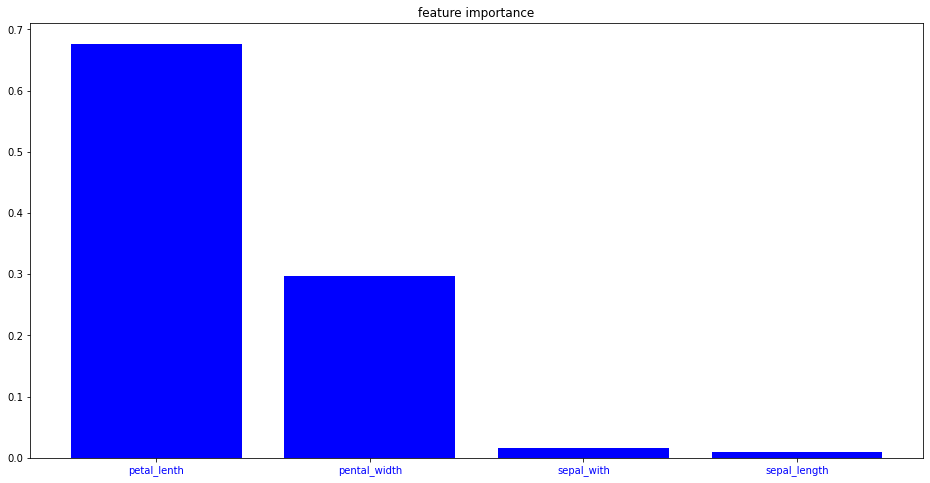

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('feature importance')
plt.bar(range(len(feature_importance)),feature_importance[indice],color = 'b')
plt.xticks(range(len(feature_importance)),np.array(feature_name)[indice],color = 'b')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

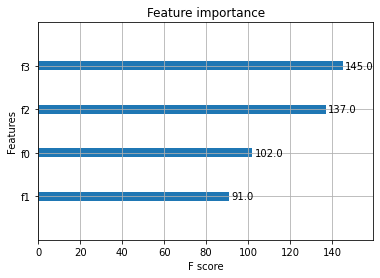

In [15]:
xgb.plot_importance(xgb_model)

In [16]:
xgb_model.feature_importances_

array([0.00959796, 0.01645038, 0.6765859 , 0.29736578], dtype=float32)